#**Housing Market Report**
####Programming group project

Prepared by:

- Andrés Ramírez
- Gonzalo Mir
- Yago Moreno
- Rubén Segura

#Import the used resources / libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Upload the dataset to your environment

####Upload the 'houses_Madrid.csv' dataset into your environment before running the next cell

####Step 1:

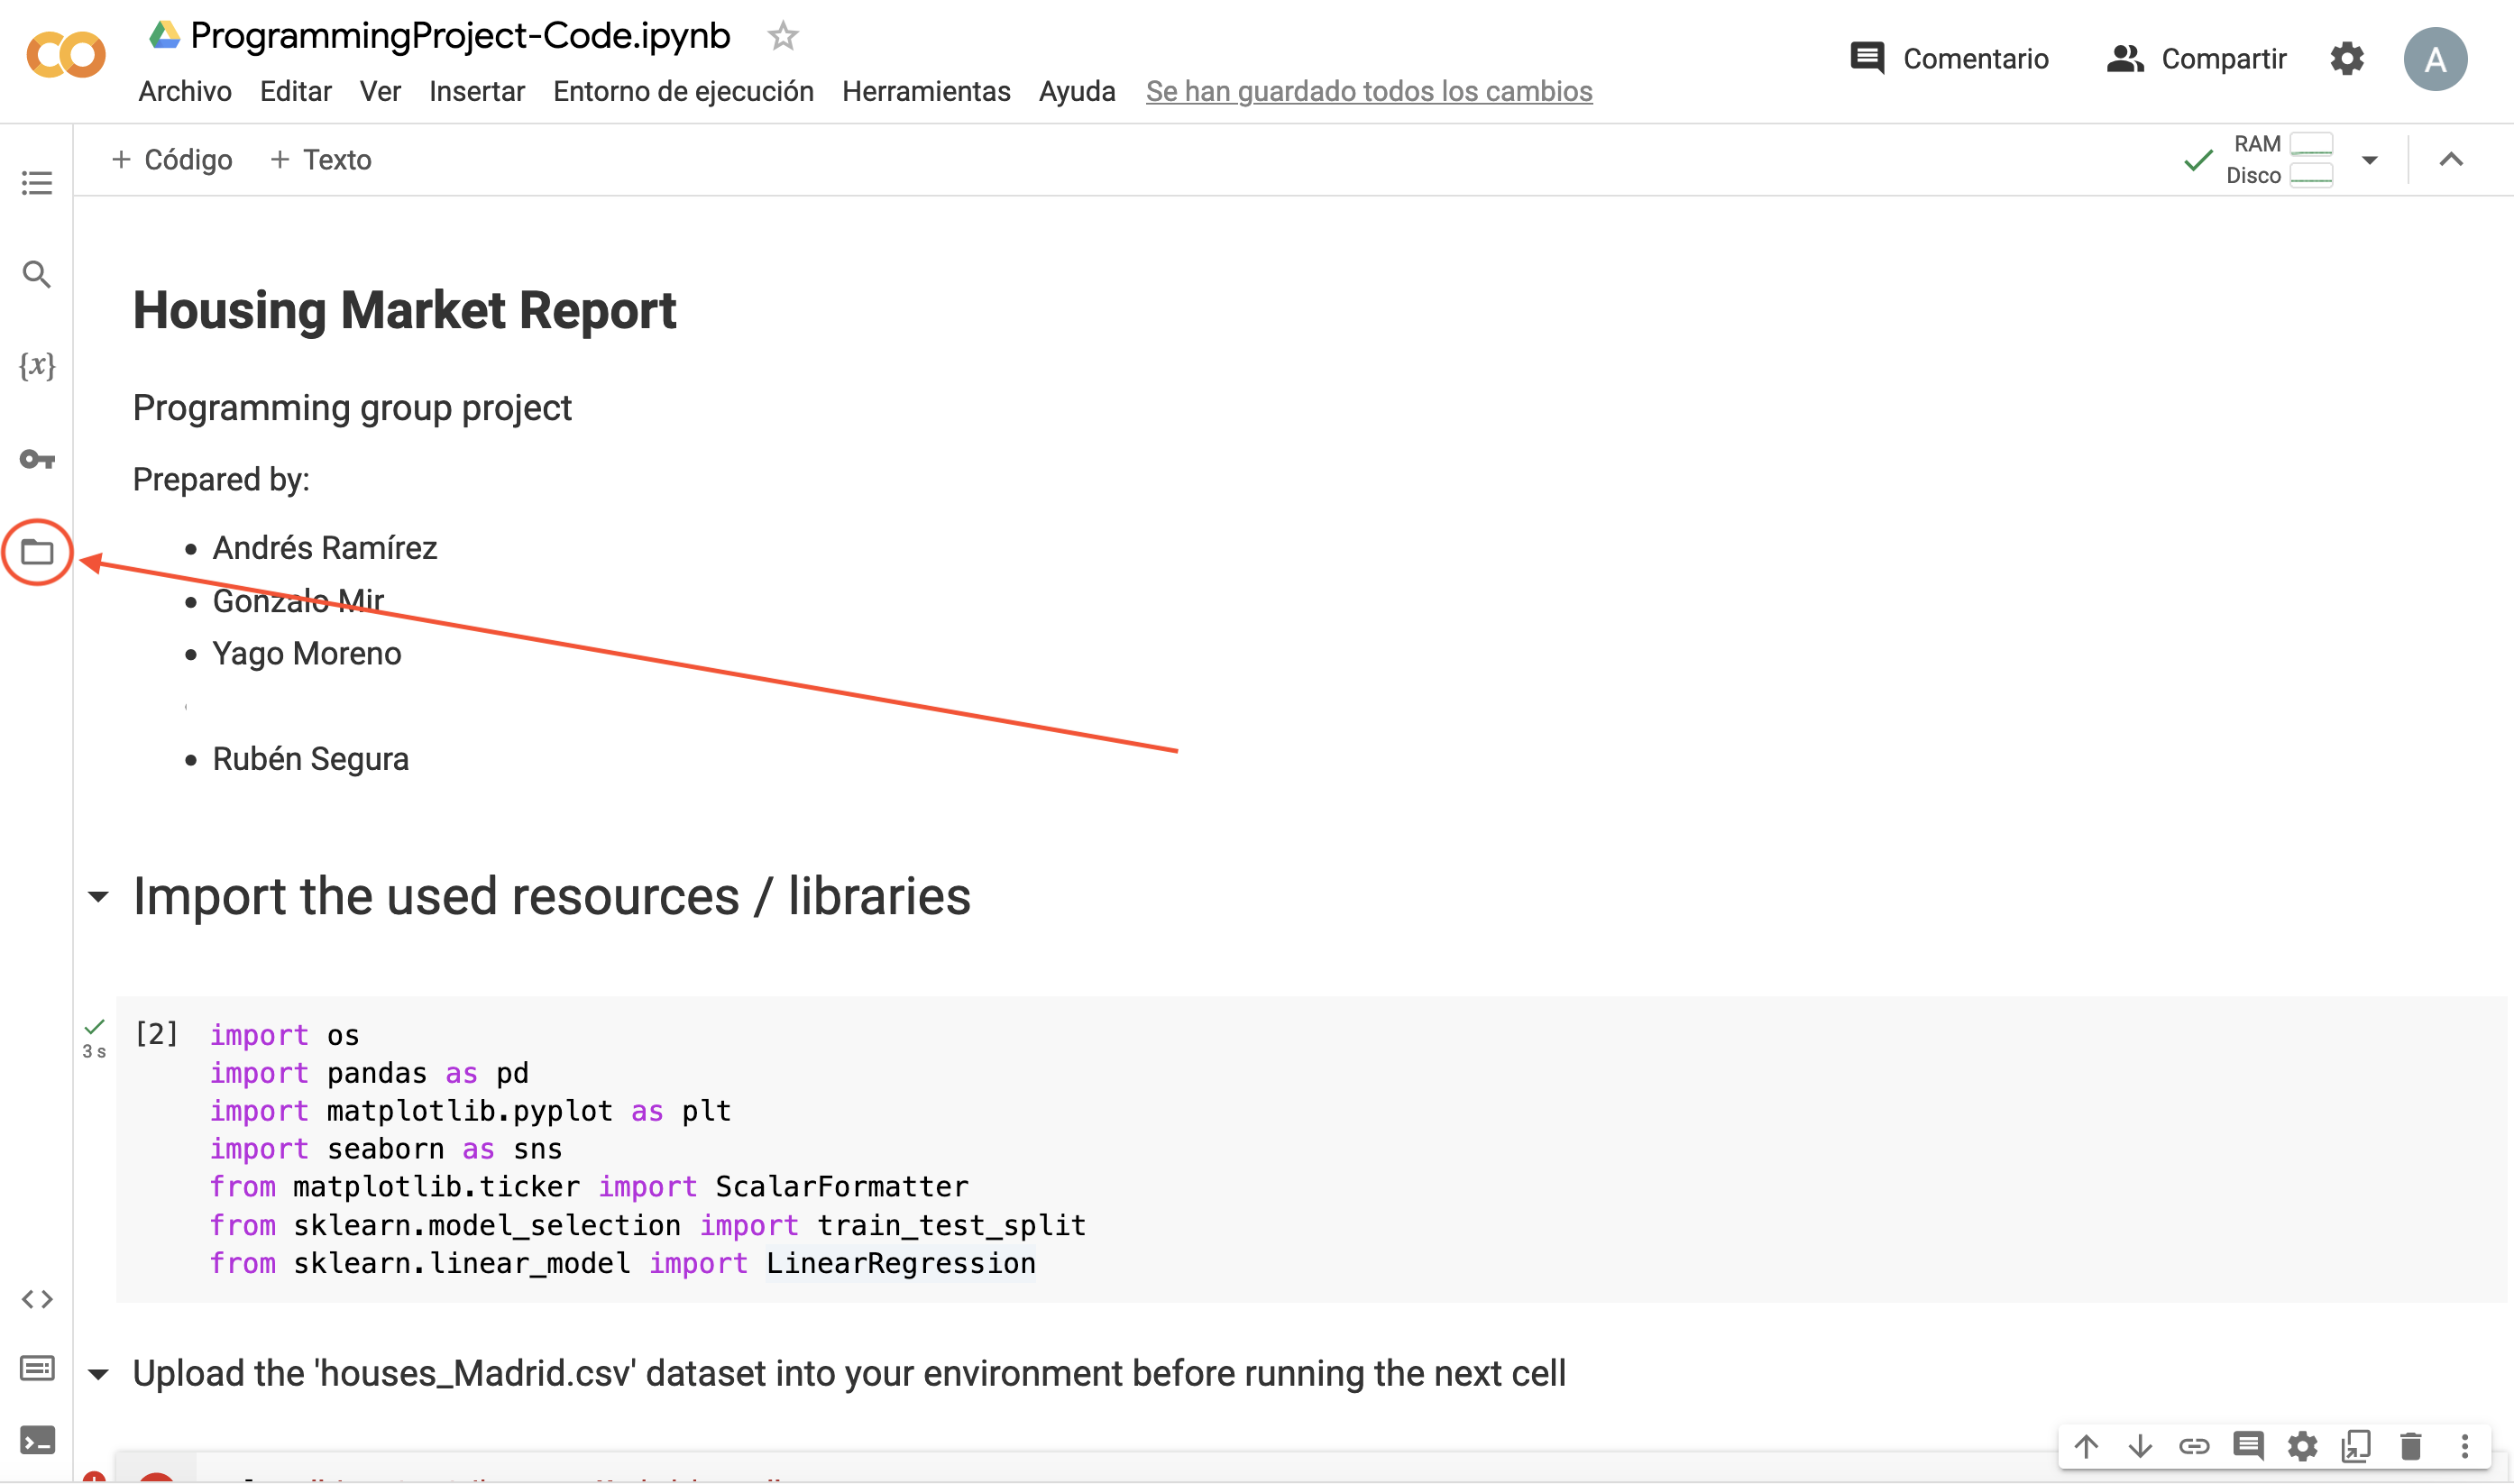

####Step 2:

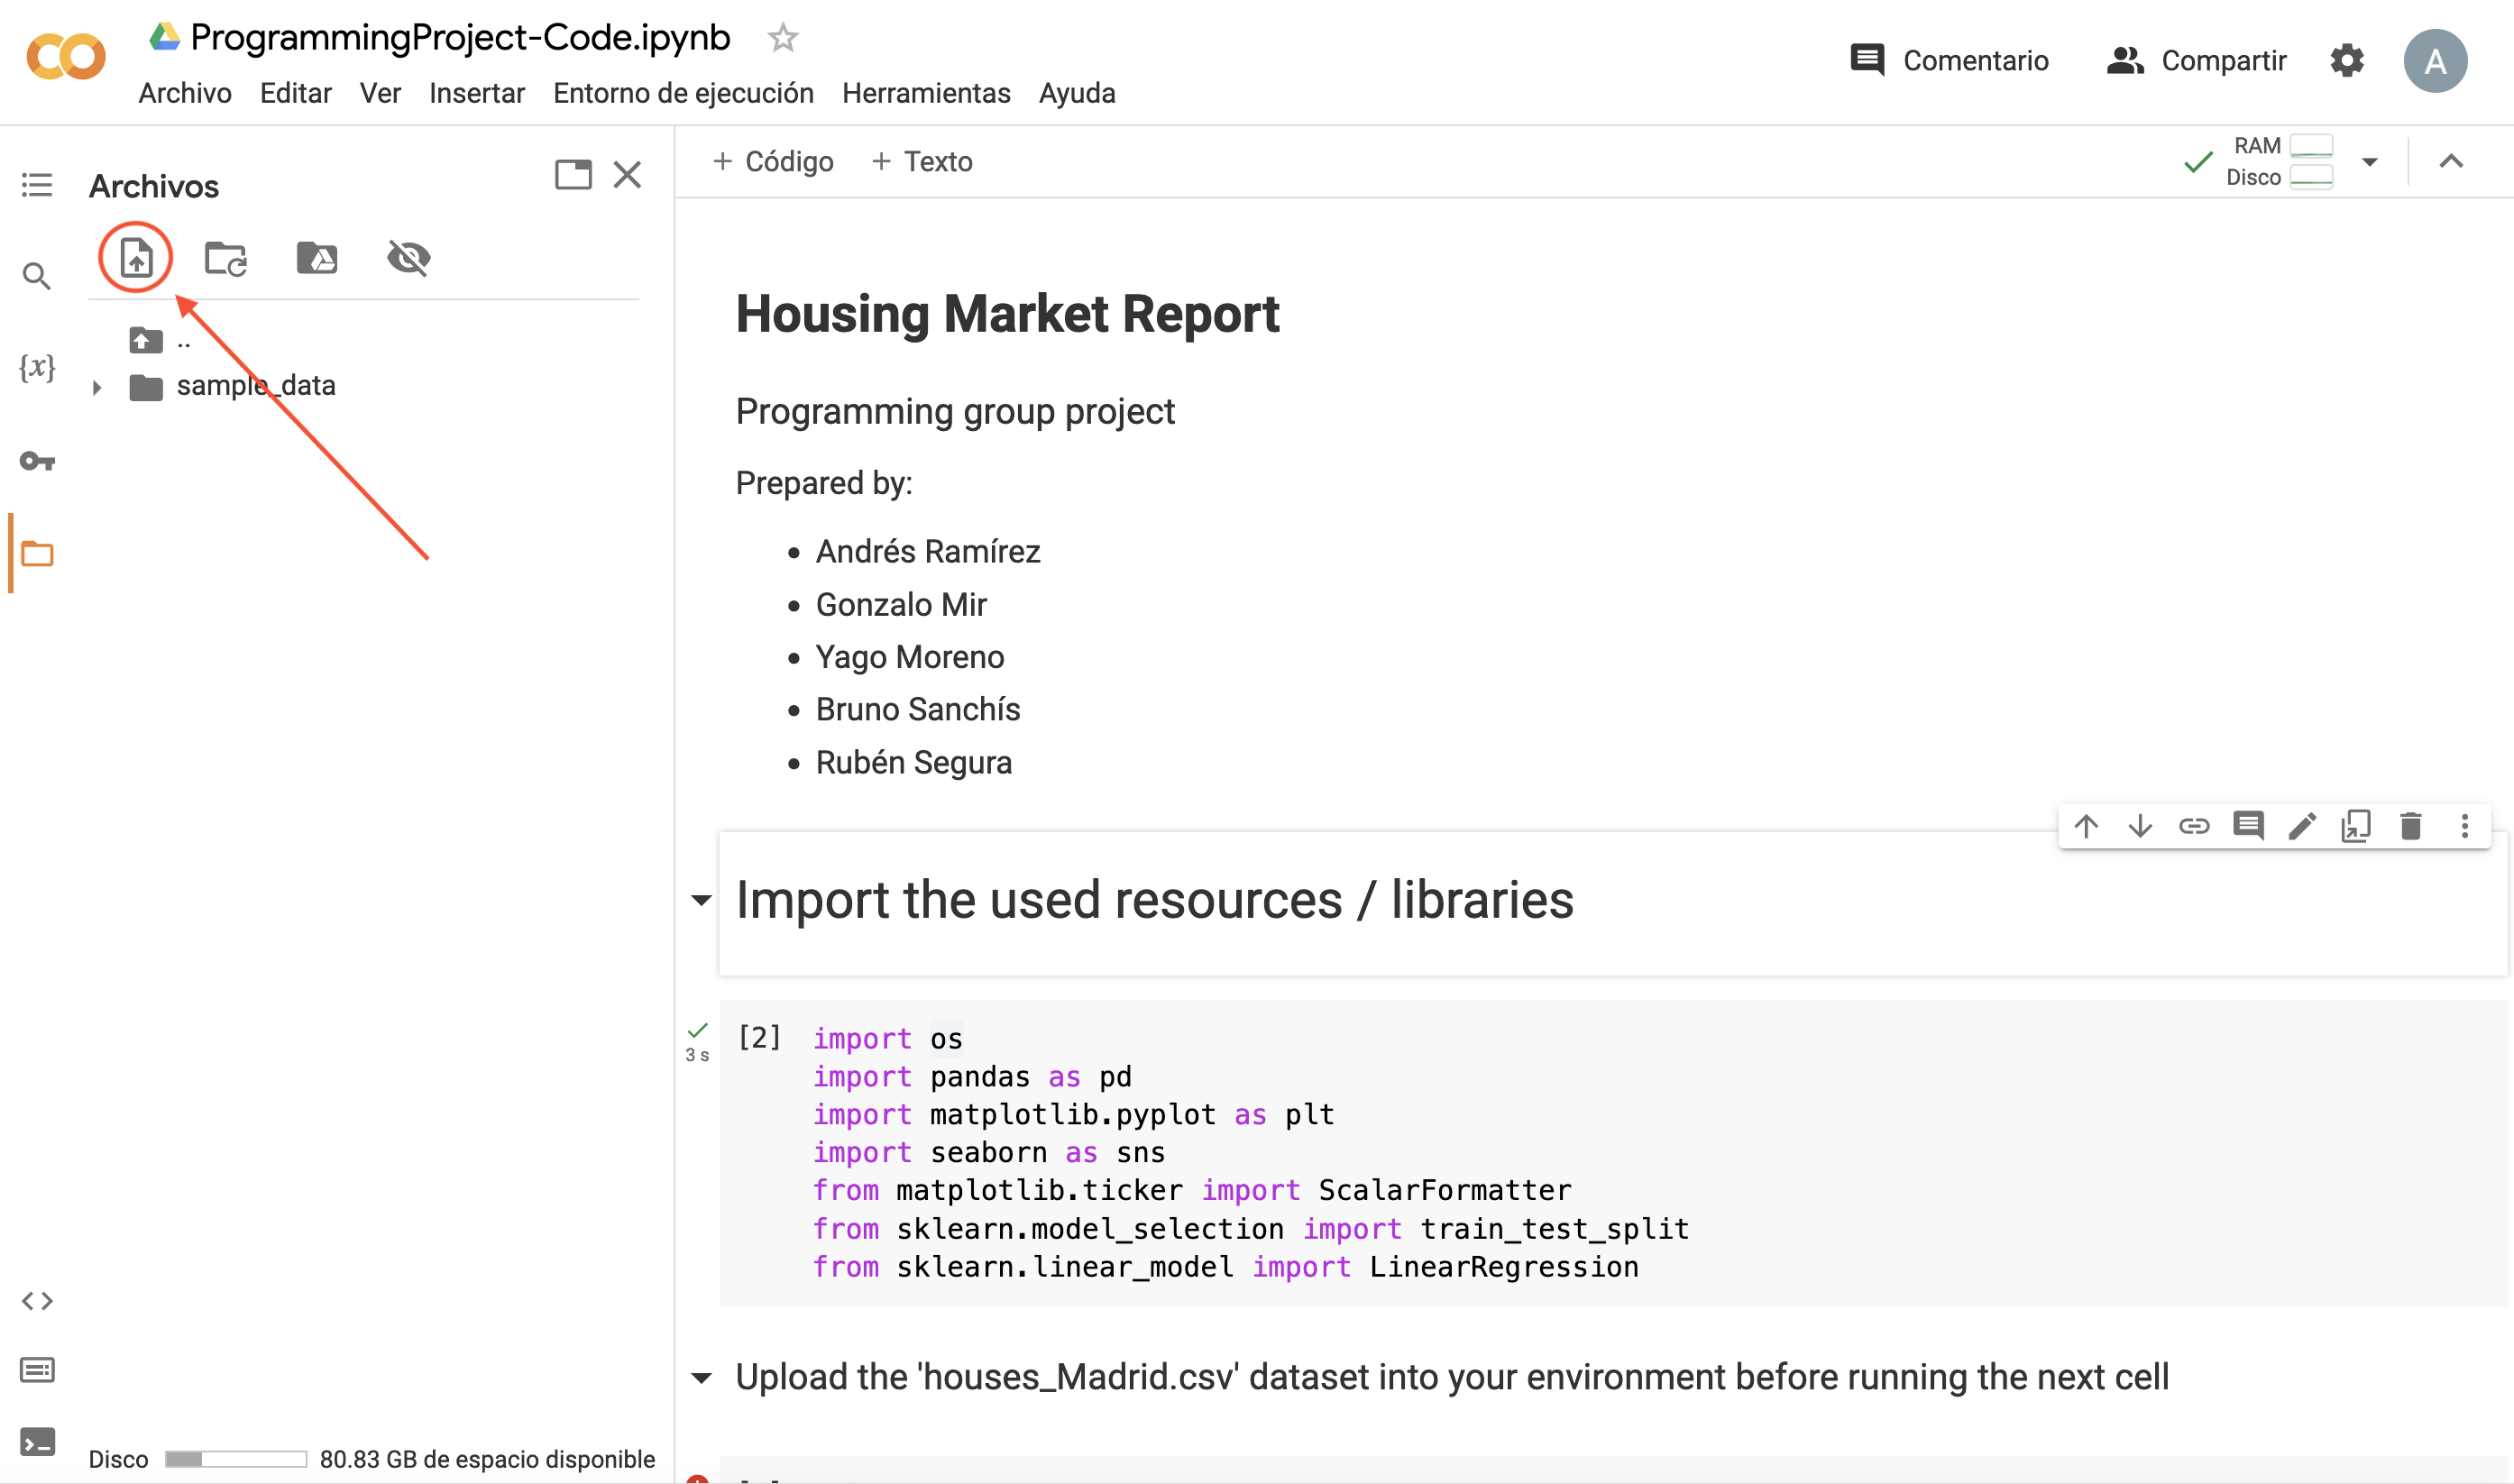

####Step 3:

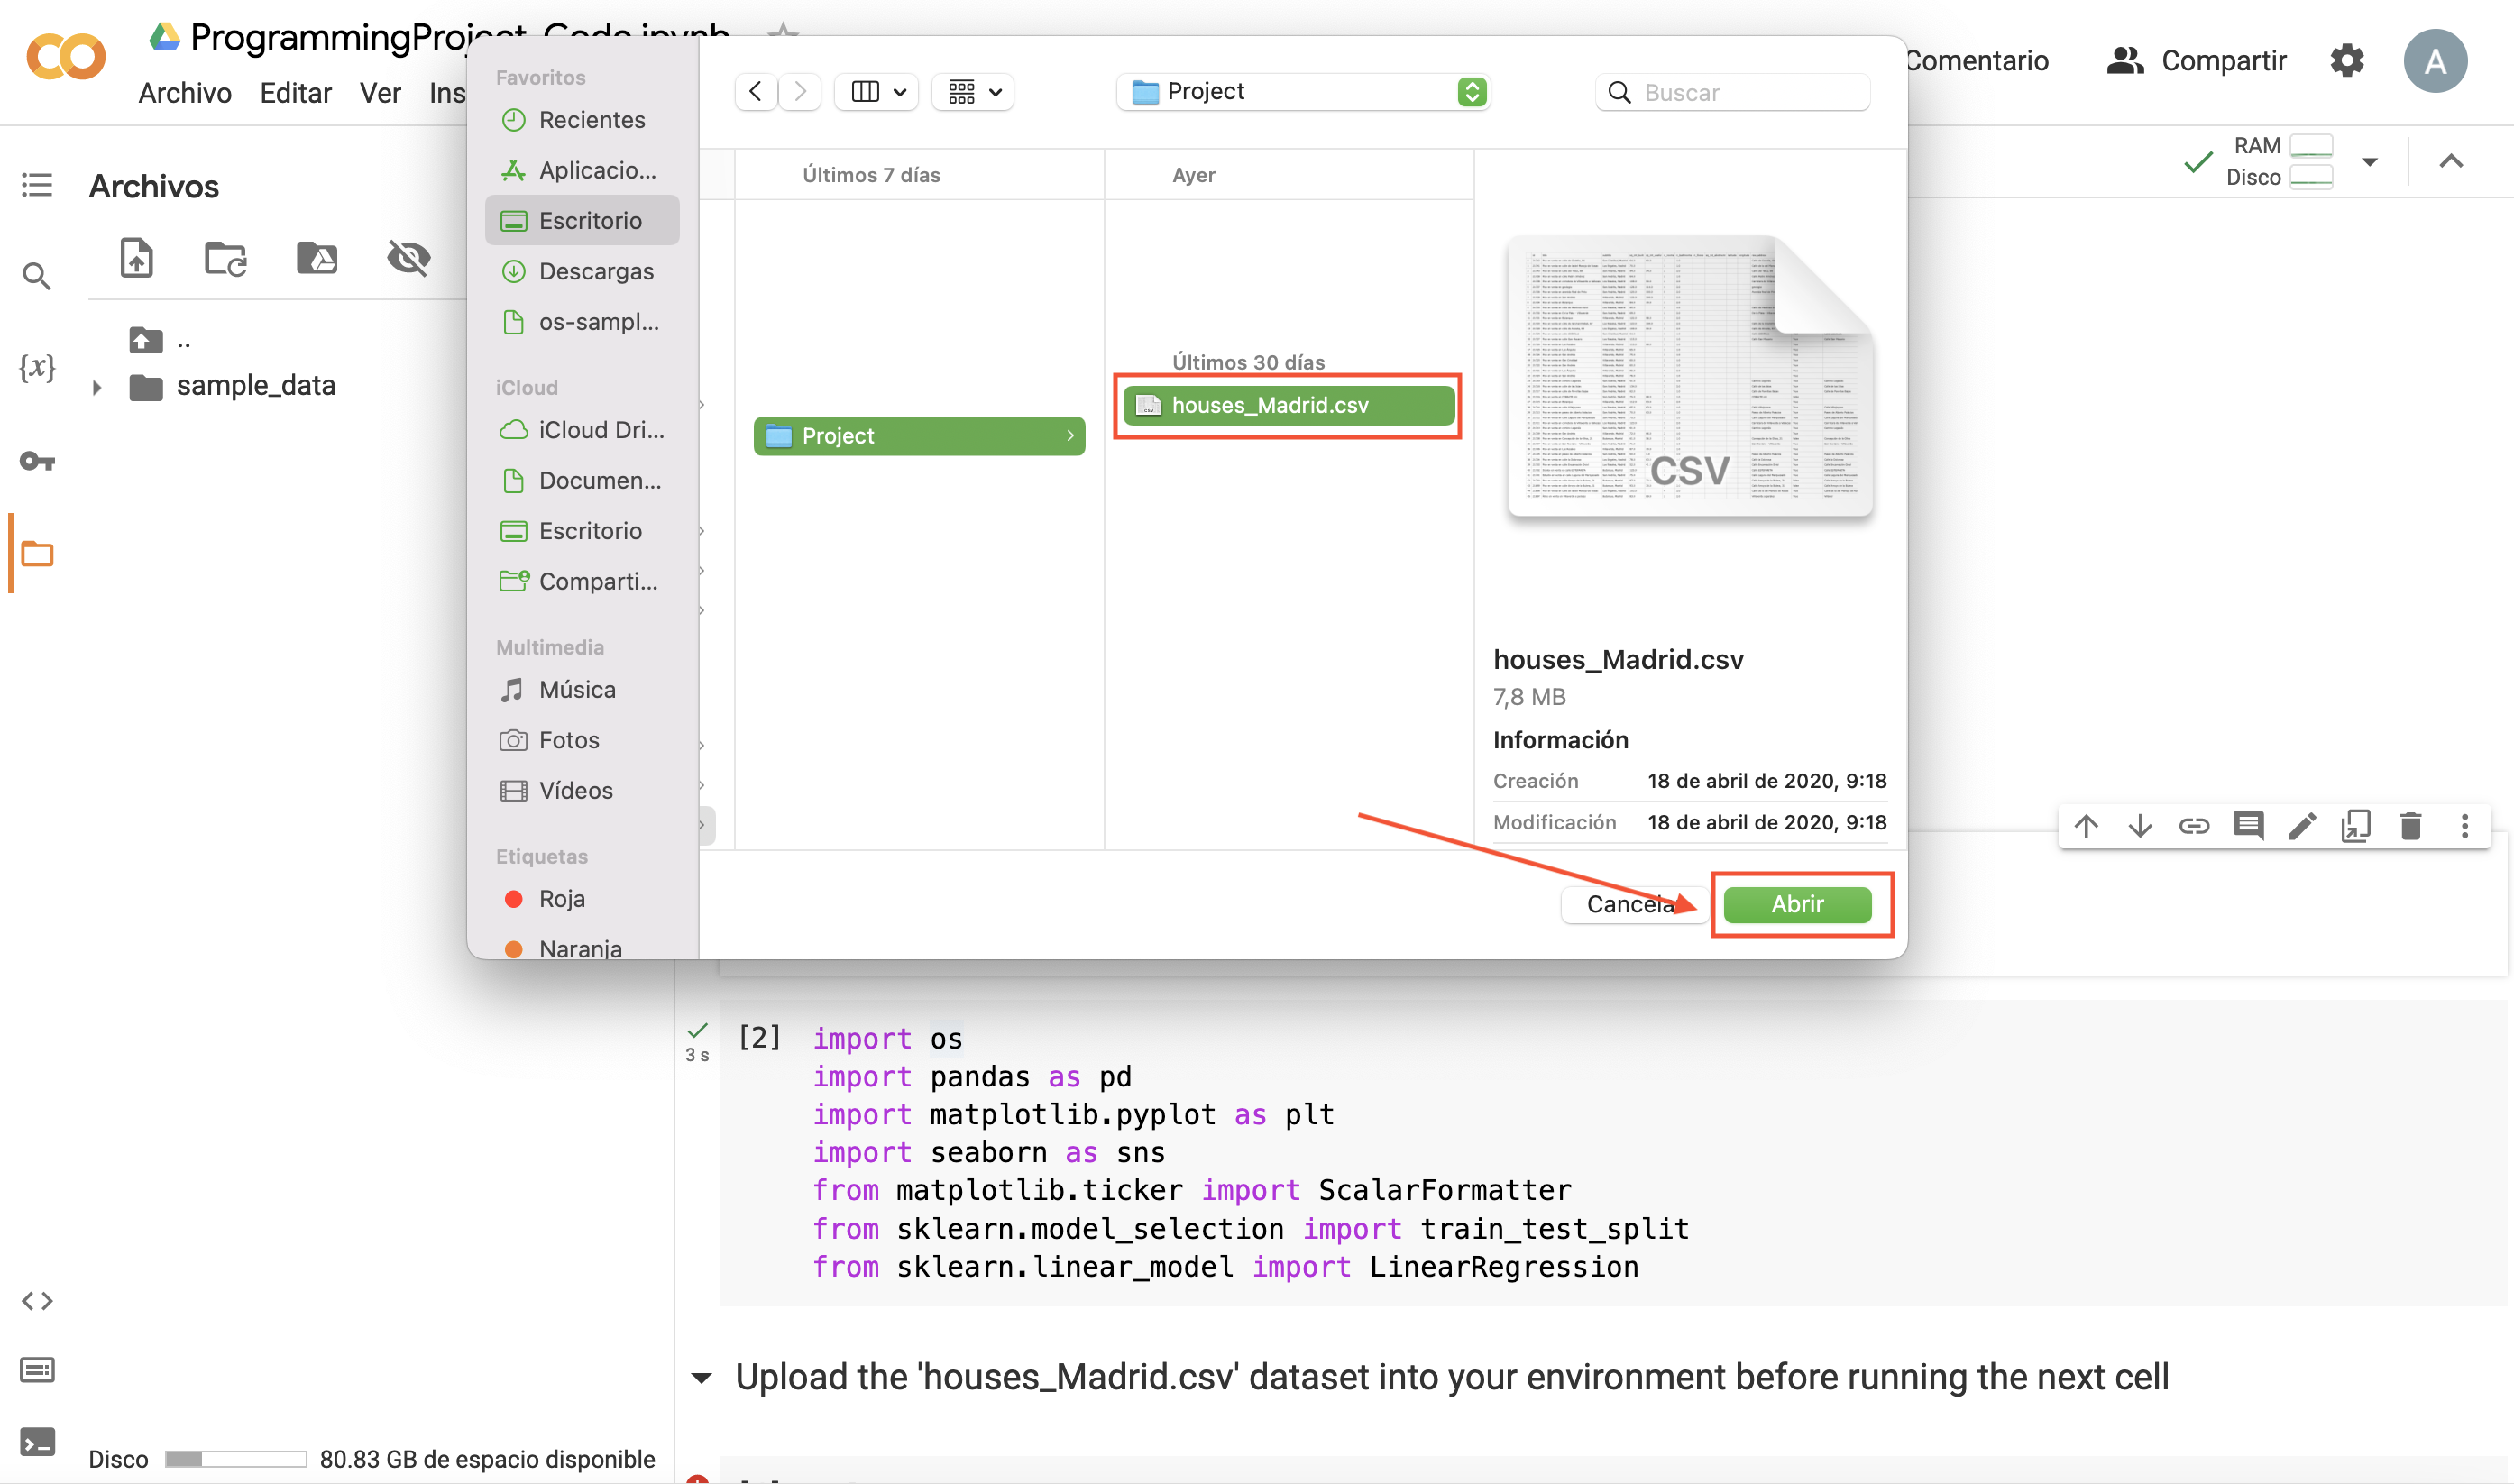

In [2]:
url = "/content/houses_Madrid.csv"
df_initial = pd.read_csv(url, sep=",")
print(df_initial.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    21742 non-null  int64  
 1   id                            21742 non-null  int64  
 2   title                         21742 non-null  object 
 3   subtitle                      21742 non-null  object 
 4   sq_mt_built                   21616 non-null  float64
 5   sq_mt_useful                  8228 non-null   float64
 6   n_rooms                       21742 non-null  int64  
 7   n_bathrooms                   21726 non-null  float64
 8   n_floors                      1437 non-null   float64
 9   sq_mt_allotment               1432 non-null   float64
 10  latitude                      0 non-null      float64
 11  longitude                     0 non-null      float64
 12  raw_address                   16277 non-null  object 
 13  i

#Clean the dataframe

#####Clean the dataframe 1: remove the columns with only Nan values

In [3]:
newdf = df_initial.dropna(axis=1, how='all')

#####Clean the dataframe 2: keep the important variables, not the specific such as address, portal, and other insignificant variables for our analysis

In [4]:
df = newdf.drop(['operation','sq_mt_useful','n_floors','sq_mt_allotment','title','subtitle','raw_address','is_exact_address_hidden',
              'street_name','street_number','neighborhood_id','is_rent_price_known','buy_price_by_area',
              'is_buy_price_known','is_floor_under','is_parking_included_in_price'], axis=1)

#####Clean the dataframe 3: change to boolean those variables containing only True or Nan values.

In [5]:
df[['is_new_development','has_central_heating','has_individual_heating','has_ac','has_fitted_wardrobes','has_lift','is_exterior','has_garden','has_pool','has_terrace','has_balcony','has_storage_room','is_accessible','has_green_zones','is_orientation_north','is_orientation_south','is_orientation_east','is_orientation_west']] = df[['is_new_development','has_central_heating','has_individual_heating','has_ac','has_fitted_wardrobes','has_lift','is_exterior','has_garden','has_pool','has_terrace','has_balcony','has_storage_room','is_accessible','has_green_zones','is_orientation_north','is_orientation_south','is_orientation_east','is_orientation_west']].fillna(False)

#####Clean the dataframe 4: change the Nan values in the variables 'parking_price' and 'built_year' as boolean values would not make sense

In [6]:
df['parking_price']=df['parking_price'].fillna('No parking')
df['parking_price']=df['parking_price'].fillna('No data')

#####Clean the dataframe 5: Eliminate the rows with Nan values from the variables. By doing this we will have the same number of useful rows for all variables. If we did this in the first step, we would have eliminated practically all rows, as the previously eliminated variables contained many Nan values.

In [7]:
df = df.dropna()

#####Clean the dataframe 6: eliminate all the duplicates inside the dataframe

In [8]:
df = df.drop_duplicates()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8712 entries, 0 to 21739
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              8712 non-null   int64  
 1   id                      8712 non-null   int64  
 2   sq_mt_built             8712 non-null   float64
 3   n_rooms                 8712 non-null   int64  
 4   n_bathrooms             8712 non-null   float64
 5   floor                   8712 non-null   object 
 6   rent_price              8712 non-null   int64  
 7   buy_price               8712 non-null   int64  
 8   house_type_id           8712 non-null   object 
 9   is_renewal_needed       8712 non-null   bool   
 10  is_new_development      8712 non-null   bool   
 11  built_year              8712 non-null   float64
 12  has_central_heating     8712 non-null   bool   
 13  has_individual_heating  8712 non-null   bool   
 14  has_ac                  8712 non-null  

#####Code for creating the file that will create the document called 'Report' where all the results will be printed


In [19]:
with open('Report.txt', 'w') as file:
    file.write('RESULTS FROM ELITE ESTATE\n\n')

#VISUALS

####Histogram showing the number of houses / distribution per price

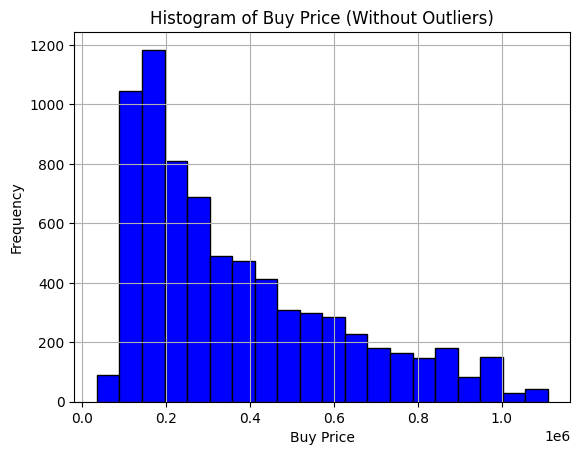


Median of Buy Price (without outliers): 290000.00€
Mean of Buy Price (without outliers): 368911.57€


In [20]:
#Firstly, we need to remove the outliers. Therefore, we calculate the upper
#and lower bonds of the values and create a new dataset with the values in
#between these bonds. Then, we create the histogram with the relevant data

Q1 = df['buy_price'].quantile(0.25)
Q3 = df['buy_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (df['buy_price'] < lower_bound) | (df['buy_price'] > upper_bound)
df_no_outliers = df[~outliers]
df_no_outliers['buy_price'].hist(bins=20, color='blue', edgecolor='black')

#Now, make the histogram using plotly library
plt.xlabel('Buy Price')
plt.ylabel('Frequency')
plt.title('Histogram of Buy Price (Without Outliers)')
plt.show()
median_price = df_no_outliers['buy_price'].median()
mean_price = df_no_outliers['buy_price'].mean()
print(f'\nMedian of Buy Price (without outliers): {median_price:.2f}€')
print(f'Mean of Buy Price (without outliers): {mean_price:.2f}€')

#Save the results in the report

with open('Report.txt', 'a') as file:
    file.write('HISTOGRAM SHOWING THE DISTRIBUTION BASED ON PRICE\n')
    file.write(f'Median of Buy Price (without outliers): {median_price:.2f}€\n')
    file.write(f'Mean of Buy Price (without outliers): {mean_price:.2f}€\n')
    file.write('\n\n\n\n')

####Correlation between the price of houses and their built square meters

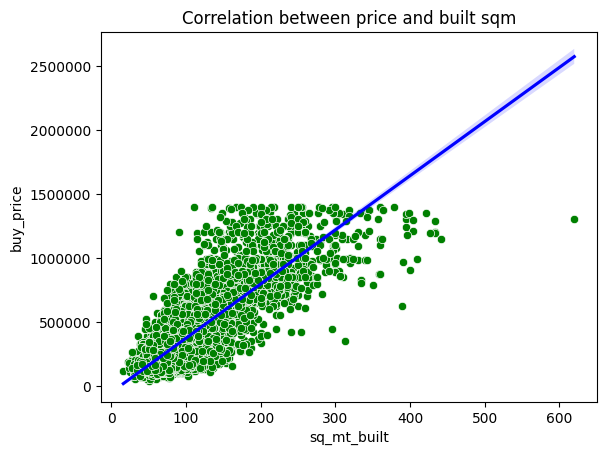


Linear Regression Coefficient: 0.825


In [21]:
sns.scatterplot(x='sq_mt_built', y='buy_price', data=df, color = 'green')
plt.xlabel('Square Meters Built')
plt.ylabel('Buy Price')
plt.title('Correlation between price and built sqm')
sns.regplot(x='sq_mt_built', y='buy_price', data=df, scatter = False, color='blue')
plt.ticklabel_format(style='plain', axis='y')
plt.show()
correlation = df['sq_mt_built'].corr(df['buy_price'])
print(f"\nLinear Regression Coefficient: {correlation:.3f}")

#Save the results in the report

with open('Report.txt', 'a') as file:
    file.write('CORRELATION BETWEEN THE PRICE OF HOUSES AND THEIR BUILT SQUARE METERS\n')
    file.write(f'The Linear Regression Coefficient is {correlation:.3f}')
    file.write('\n\n\n\n')

####Rent price distribution based on renewal needs

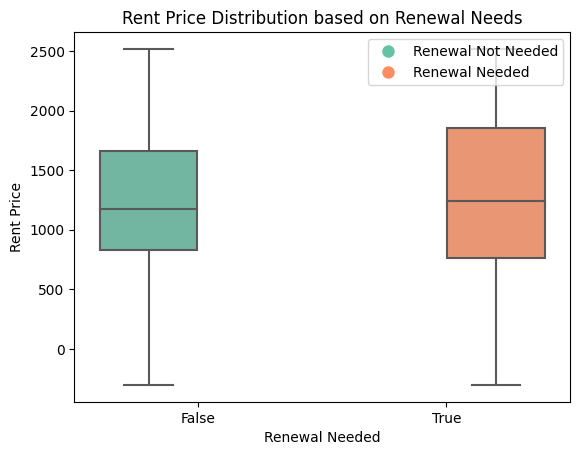

In [24]:
#Remove outliers from the df using the IQ method
Q1 = df['rent_price'].quantile(0.25)
Q3 = df['rent_price'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
df_filtered = df[(df['rent_price'] >= lower_limit) & (df['rent_price'] <= upper_limit)]

#Boxplot creation
df_filtered.loc[:, 'is_renewal_needed'] = df_filtered['is_renewal_needed'].copy()
sns.boxplot(x='is_renewal_needed', y='rent_price', data=df_filtered, palette='Set2', hue='is_renewal_needed')

plt.title('Rent Price Distribution based on Renewal Needs')
plt.xlabel('Renewal Needed')
plt.ylabel('Rent Price')

#We wanted to put a legend but the format we used afterwards was not working.
#That's why we looked on the internet how to do it. Thus, the code may seem more professional.
colors = sns.color_palette('Set2')
legend_labels = ['Renewal Not Needed', 'Renewal Needed']
legend_patches = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
plt.legend(legend_patches, legend_labels,loc='upper right')
plt.show()

#Relevant data from the boxplot

median_renewal_needed = df_filtered[df_filtered['is_renewal_needed'] == 1]['rent_price'].median()
q1_renewal_needed = df_filtered[df_filtered['is_renewal_needed'] == 1]['rent_price'].quantile(0.25)
q3_renewal_needed = df_filtered[df_filtered['is_renewal_needed'] == 1]['rent_price'].quantile(0.75)
mean_renewal_needed = df_filtered[df_filtered['is_renewal_needed'] == 1]['rent_price'].mean()

median_not_renewal_needed = df_filtered[df_filtered['is_renewal_needed'] == 0]['rent_price'].median()
q1_not_renewal_needed = df_filtered[df_filtered['is_renewal_needed'] == 0]['rent_price'].quantile(0.25)
q3_not_renewal_needed = df_filtered[df_filtered['is_renewal_needed'] == 0]['rent_price'].quantile(0.75)
mean_not_renewal_needed = df_filtered[df_filtered['is_renewal_needed'] == 0]['rent_price'].mean()

#Save the results into the document

with open('Report.txt', 'a') as file:
    file.write('RENT PRICE DISTRIBUTION BASED ON RENEWAL NEEDS\n')
    file.write(f'Statistics for Renewal Needed:\n')
    file.write(f'Median={median_renewal_needed}, Q1={q1_renewal_needed}, Q3={q3_renewal_needed}, Mean={mean_renewal_needed}\n')
    file.write('Statistics for Renewal Not Needed:\n')
    file.write(f'Median={median_not_renewal_needed}, Q1={q1_not_renewal_needed}, Q3={q3_not_renewal_needed}, Mean={mean_not_renewal_needed}')
    file.write('\n\n\n\n')


####Grouped bar chart containing the number of homes per type and their respective heating system

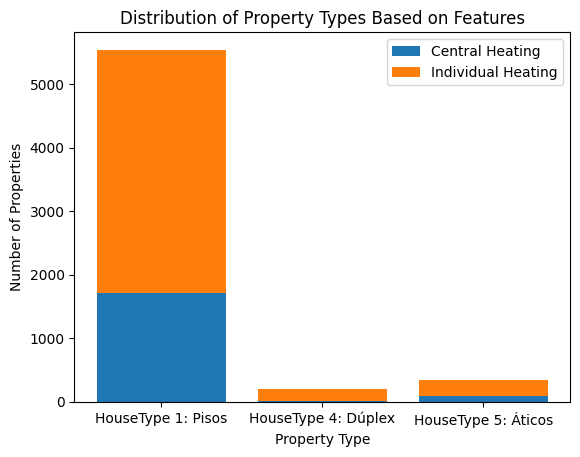

In [26]:
feature_counts = df.groupby('house_type_id').agg(
    {'has_central_heating': 'sum', 'has_individual_heating': 'sum'}
).reset_index()
fig, ax = plt.subplots()
ax.bar(feature_counts['house_type_id'], feature_counts['has_central_heating'], label='Central Heating')
ax.bar(feature_counts['house_type_id'], feature_counts['has_individual_heating'], bottom=feature_counts['has_central_heating'], label='Individual Heating')
ax.set_ylabel('Number of Properties')
ax.set_xlabel('Property Type')
ax.set_title('Distribution of Property Types Based on Features')
ax.legend()
plt.show()

#Save the results in the report
feature_counts_str = feature_counts.to_string(index = False) #Convert the df into string to allow writing it in the doc
with open('Report.txt', 'a') as file:
    file.write('GROUPED BAR CHART WITH THE NUMBER OF HOMES PER TYPE AND HEATING SYSTEM\n')
    file.write("The count of the type of heating and home type:\n")
    file.write(feature_counts_str)
    file.write('\n\n\n\n')

####Pie chart displaying the distribution of sold houses depending on their orientation

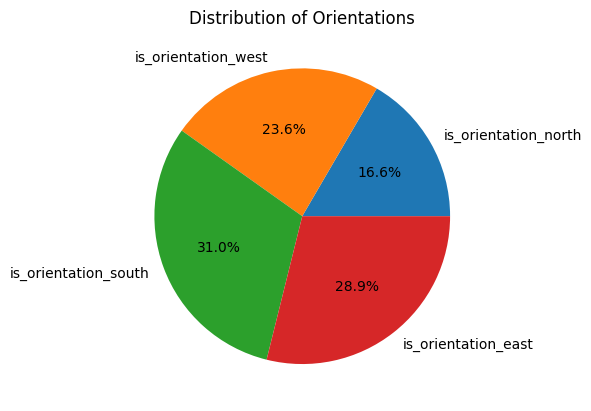

In [27]:
orientation_columns = ['is_orientation_north', 'is_orientation_west', 'is_orientation_south', 'is_orientation_east']
orientation_data = df[orientation_columns]
orientation_counts = orientation_data.sum()
plt.pie(orientation_counts, labels=orientation_counts.index,autopct='%1.1f%%')
plt.title('Distribution of Orientations')
plt.show()

#Save the percentages into separate variables
total_orientations = orientation_counts.sum()
percentage_north = (orientation_counts['is_orientation_north'] / total_orientations) * 100
percentage_west = (orientation_counts['is_orientation_west'] / total_orientations) * 100
percentage_south = (orientation_counts['is_orientation_south'] / total_orientations) * 100
percentage_east = (orientation_counts['is_orientation_east'] / total_orientations) * 100

#Save the plot and the results in the document
with open('Report.txt', 'a') as file:
    file.write('PIECHART SHOWING THE DISTRIBUTION OF HOUSES BASED ON ORIENTATION\n')
    file.write(f"Percentage North: {percentage_north}%\n")
    file.write(f"Percentage South: {percentage_south}%\n")
    file.write(f"Percentage West: {percentage_west}%\n")
    file.write(f"Percentage East: {percentage_east}%\n")
    file.write('\n\n\n\n')

####Line chart showing the evolution of construction during the years

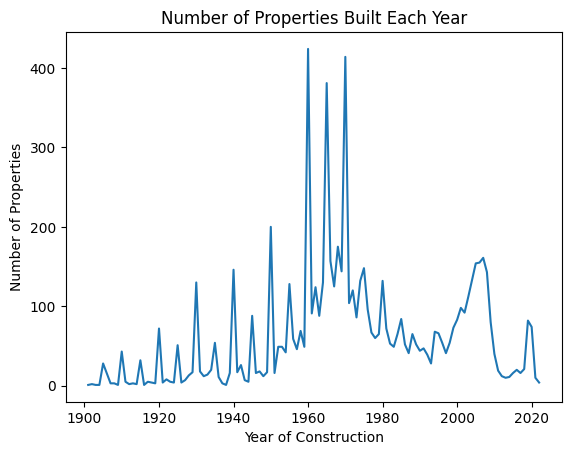

In [28]:
df['built_year'] = pd.to_numeric(df['built_year'], errors='coerce')
df = df.dropna(subset=['built_year'])
df = df[(df['built_year'] > 1900) & (df['built_year'] <= 2023)]
construction_data = df.groupby('built_year').size().reset_index(name='property_count')
plt.plot(construction_data['built_year'], construction_data['property_count'])
plt.title('Number of Properties Built Each Year')
plt.xlabel('Year of Construction')
plt.ylabel('Number of Properties')
plt.show()

#Maximums and minimums obtaining
three_max_values = construction_data.nlargest(3, 'property_count')
three_min_values = construction_data.nsmallest(3, 'property_count')

#Save the results in the document
with open('Report.txt', 'a') as file:
    file.write('LINE CHART SHOWING THE NUMBER OF BUILT HOMES PER YEAR\n')
    file.write(f"Top 3 Years with Most Properties Built:\n{three_max_values}\n")
    file.write(f"Top 3 Years with Least Properties Built:\n{three_min_values}\n")
    file.write('\n\n\n\n')

#PREDICTOR

#####Using less variables to increase the accuracy of the model

In [29]:
#The model to obtain the intercept value and the coefficients (beta values)
# of each independent variable

X = df[['n_rooms','n_bathrooms','sq_mt_built','has_parking']]
y = df['buy_price']
X['has_parking'] = X['has_parking'].astype(int)
X = X.astype(float)
model = LinearRegression()
model.fit(X, y)
intercept = model.intercept_
coefficients = model.coef_
print(intercept)
print(coefficients)


-35135.8151443316
[-42369.60344139  87434.14358508   3822.45662428  -7781.98323999]


<ipython-input-29-c7ab199ac265>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['has_parking'] = X['has_parking'].astype(int)


In [30]:
#The predictor using OOP

class Predictor:
    def __init__(self, n_rooms, n_bathrooms, sq_mt_built,has_parking):
        self.n_rooms = n_rooms
        self.n_bathrooms = n_bathrooms
        self.sq_mt_built = sq_mt_built
        self.has_parking = has_parking

    def calculator(self):
        n_roomsv = 91543.18
        n_bathroomsv = 102509.02
        sq_mt_builtv = 6077.9
        has_parkingv = 75195.16
        intercept = 120692.33
        resultprice = intercept + self.n_rooms * n_roomsv + self.n_bathrooms * n_bathroomsv + self.sq_mt_built * sq_mt_builtv + self.has_parking*has_parkingv
        return resultprice

a = int(input('How many rooms does the house have?\n'))
b = int(input('How many bathrooms does the house have?\n'))
c = int(input('How many square meters built does the house have?\n'))
d = input('Does it have parking?')
if d.lower() == 'yes':
  d = 1
else:
  d = 0
my_predictor = Predictor(a, b, c,d)
result = my_predictor.calculator()

print(f'The price of the home would be {result:.2f}€')

#Save the results in the report
with open('Report.txt', 'a') as file:
    file.write('PREDICTOR RESULT\n')
    file.write(f"Your home had {a} room/s, {b} bathroom/s, {c} built square meters\n")
    file.write(f"To the question of whether the home had parking you answered: {d}")
    file.write(f'With this information, Elite Estate estimates the price of your house at {result:.2f}€')
    file.write('\n\n\n')
    file.write('Provided by: Elite Estate')

How many rooms does the house have?
4
How many bathrooms does the house have?
2
How many square meters built does the house have?
132
Does it have parking?yes
The price of the home would be 1569361.05€


#####We tried doing the predictor with most of the independent binary variables, such as 'has_ac', 'has_garden',etc. However, the predictor results were not accurate as most of the independent variables have high multicolinearity with the dependent variable. With high multicolinearity, the individual contribution of each parameter (independent variable) is difficult to assess.

In [ ]:
#The proof of it

X = df[['has_central_heating', 'has_ac', 'has_fitted_wardrobes', 'has_lift', 'is_exterior',
        'has_garden', 'has_pool', 'has_terrace', 'has_balcony', 'has_storage_room',
        'is_accessible', 'has_green_zones', 'has_parking']]
y = df['buy_price']
X = X.astype(float)

def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["feature"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data
vif_data = calculate_vif(X)

model = LinearRegression()
model.fit(X, y)
intercept = model.intercept_
coefficients = model.coef_
print(intercept)
print(coefficients)

#Values do not make sense


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


VIF:
                 feature       VIF
0    has_central_heating  1.553562
1                 has_ac  2.604741
2   has_fitted_wardrobes  3.990908
3               has_lift  4.904231
4            is_exterior  4.629293
5             has_garden       NaN
6               has_pool  2.709206
7            has_terrace  1.847267
8            has_balcony  1.219862
9       has_storage_room  2.104588
10         is_accessible  1.605826
11       has_green_zones  2.587154
12           has_parking  2.509056
37053.23827815615
[ 3.10020199e+05  1.19141537e+05 -2.68271471e+04  2.49221216e+05
  5.64250214e+04  5.82076609e-11 -2.46511700e+04  2.46603038e+04
  1.78456224e+05  1.75220611e+05 -1.29668324e+05 -1.31119678e+05
  2.67491293e+05]


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
